# Import libraries and Acquaring Data

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import yfinance as yf

In [58]:
icici=yf.download('ICICIBANK.NS',start='2010-01-01',end='2022-12-31',period='1d')

[*********************100%***********************]  1 of 1 completed


In [59]:
icici

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+05:30,159.454544,160.909088,159.090912,159.945450,134.815323,9162186
2010-01-05 00:00:00+05:30,161.454544,163.590912,160.272720,161.463638,136.094986,14659997
2010-01-06 00:00:00+05:30,162.727264,164.972733,161.836365,162.699997,137.137085,20410054
2010-01-07 00:00:00+05:30,163.045456,163.045456,159.363632,161.163635,135.842117,10852286
2010-01-08 00:00:00+05:30,161.654541,161.818176,158.363632,158.899994,133.934097,20580934
...,...,...,...,...,...,...
2022-12-26 00:00:00+05:30,881.099976,897.000000,875.250000,893.200012,893.200012,6943159
2022-12-27 00:00:00+05:30,897.700012,902.750000,888.200012,900.650024,900.650024,4994381
2022-12-28 00:00:00+05:30,896.000000,903.950012,895.799988,898.950012,898.950012,8980300


#Data Visualization


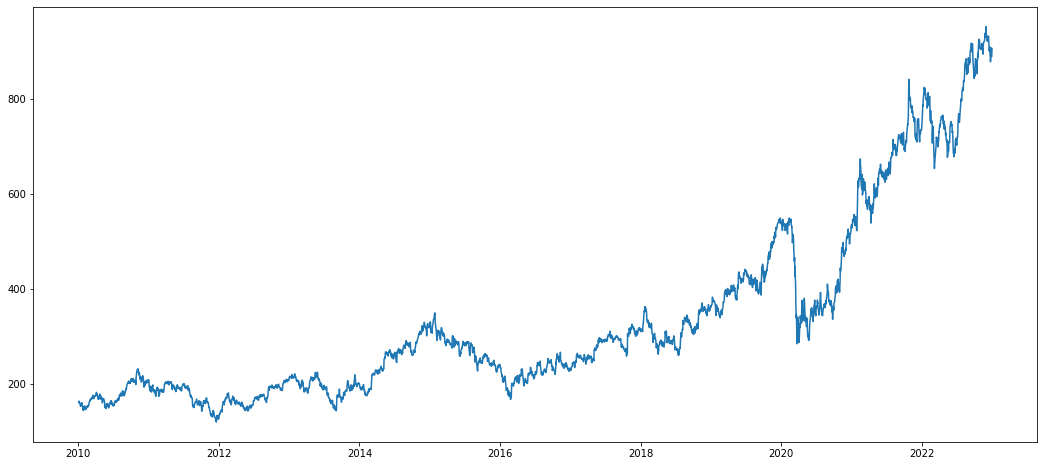

In [60]:
plt.figure(figsize=(18,8))
plt.plot(icici.Close,label='icici')

In [61]:
 from sklearn.preprocessing import MinMaxScaler
 mm=MinMaxScaler()

#Train/Test Split


In [62]:
tstart=2010
tend=2021

In [63]:
def graph(Stock):
  plt.figure(figsize=(15,5))
  icici.loc['2010':'2020','Close'].plot(legend=True)
  icici.loc['2021':,'Close'].plot(legend=True)
  plt.legend(['Train set','Test set'])
  plt.title('Stock price')
  plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
def rmse(predicted,actual):
  rmse=np.sqrt(mean_squared_error(predicted,actual))
  print('The RMSE of the Value are :',rmse)

In [65]:
def train_test(i):
  train=i.loc['2010':'2020','Close'].values
  test=i.loc['2021':,'Close'].values
  return train,test

In [66]:
train_set,test_set= train_test(icici)


In [67]:
train_set.shape,test_set.shape

((2713,), (496,))

#Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))

In [69]:
train_reshape=train_set.reshape(-1,1)
train_scaled=mm.fit_transform(train_reshape)

In [70]:
train_scaled.shape

(2713, 1)

In [71]:
def split(df,steps):
  x,y=list(),list()
  for i in range (len(df)):
    a=i+steps
    if a>len(df)-1:
      break
    xx,yy=df[i:a],df[a]
    x.append(xx)
    y.append(yy)
  return np.array(x),np.array(y)  


In [72]:
steps=100
x_train,y_train=split(train_scaled,steps)

In [73]:
x_train.shape,y_train.shape

((2613, 100, 1), (2613, 1))

In [74]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [75]:
y_train

array([[0.0779251 ],
       [0.07976183],
       [0.08474432],
       ...,
       [0.95215969],
       [0.95204361],
       [0.96667432]])

#LSTM Model

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,GRU,Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [77]:
model_lstm=Sequential()
model_lstm.add(LSTM(units=100,activation='sigmoid',input_shape=(steps,1)))
model_lstm.add(Dense(units=1))

In [78]:
model_lstm.compile(optimizer='RMSprop',loss='mse')

In [79]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [80]:
model_lstm.fit(x_train,y_train,epochs=40,batch_size=45)

Epoch 1/40
59/59 [==============================] - 13s 194ms/step - loss: 0.0473
Epoch 2/40
59/59 [==============================] - 16s 279ms/step - loss: 0.0306
Epoch 3/40
59/59 [==============================] - 15s 252ms/step - loss: 0.0219
Epoch 4/40
59/59 [==============================] - 7s 124ms/step - loss: 0.0142
Epoch 5/40
59/59 [==============================] - 7s 119ms/step - loss: 0.0098
Epoch 6/40
59/59 [==============================] - 7s 116ms/step - loss: 0.0079
Epoch 7/40
59/59 [==============================] - 7s 115ms/step - loss: 0.0074
Epoch 8/40
59/59 [==============================] - 7s 116ms/step - loss: 0.0063
Epoch 9/40
59/59 [==============================] - 7s 116ms/step - loss: 0.0058
Epoch 10/40
59/59 [==============================] - 7s 116ms/step - loss: 0.0054
Epoch 11/40
59/59 [==============================] - 7s 117ms/step - loss: 0.0045
Epoch 12/40
59/59 [==============================] - 7s 115ms/step - loss: 0.0043
Epoch 13/40
59/59 [===

In [81]:
dataset_total = icici.loc[:,"Close"]
inputs = dataset_total[len(dataset_total) - len(test_set) - steps :].values
print(type(inputs))


<class 'numpy.ndarray'>


In [82]:
input= inputs.reshape(-1,1)
input =mm.transform(input)
xtt,ytt=split(input,steps)
xtt=xtt.reshape(xtt.shape[0],xtt.shape[1],1)
model_pred=model_lstm.predict(xtt)
model_pred=mm.inverse_transform(model_pred)

16/16 [==============================] - 1s 26ms/step


In [83]:
print(rmse(model_pred,test_set))

The RMSE of the Value are : 13.88497677446991
None


In [84]:
def graph_pred(test,pred):
  plt.figure(figsize=(20,10))
  plt.plot(test,color='black',label='Real Values')
  plt.plot(pred,color='red',label='Predicted Values')
  plt.xlabel('Time')
  plt.ylabel('ICICI Price')
  plt.legend()
  plt.show()

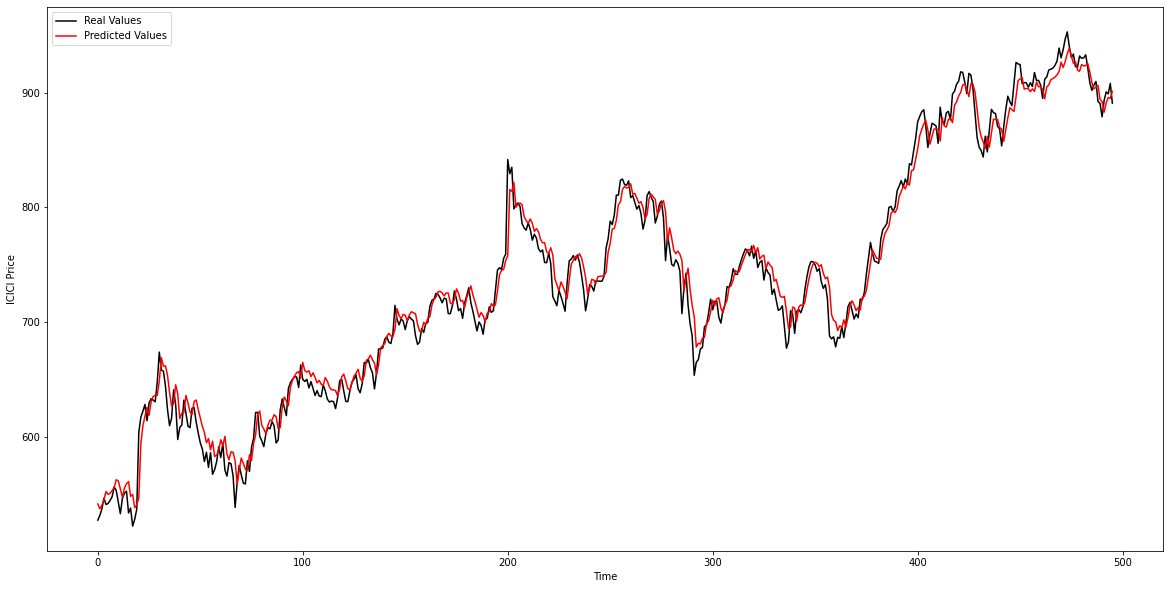

None


In [85]:
print(graph_pred(test_set,model_pred))

#GRU Model

In [86]:
model_gru=Sequential()
model_gru.add(GRU(units=100,activation='tanh', input_shape=(steps,1)))
model_gru.add(Dense(units=1))


In [87]:
model_gru.compile(optimizer='SGD',loss='mse')

In [88]:
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 100)               30900     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_gru.fit(x_train,y_train,epochs=30,batch_size=45)

Epoch 1/30
59/59 [==============================] - 10s 132ms/step - loss: 0.0756
Epoch 2/30
59/59 [==============================] - 12s 207ms/step - loss: 0.0388
Epoch 3/30
59/59 [==============================] - 12s 197ms/step - loss: 0.0280
Epoch 4/30
59/59 [==============================] - 7s 111ms/step - loss: 0.0201
Epoch 5/30
59/59 [==============================] - 4s 73ms/step - loss: 0.0143
Epoch 6/30
59/59 [==============================] - 4s 73ms/step - loss: 0.0102
Epoch 7/30
59/59 [==============================] - 4s 74ms/step - loss: 0.0072
Epoch 8/30
59/59 [==============================] - 4s 75ms/step - loss: 0.0051
Epoch 9/30
59/59 [==============================] - 4s 76ms/step - loss: 0.0036
Epoch 10/30
59/59 [==============================] - 4s 74ms/step - loss: 0.0025
Epoch 11/30
59/59 [==============================] - 4s 73ms/step - loss: 0.0018
Epoch 12/30
59/59 [==============================] - 4s 73ms/step - loss: 0.0013
Epoch 13/30
59/59 [===========

In [90]:
gru_pred=model_gru.predict(xtt)
gru_pred=mm.inverse_transform(gru_pred)

16/16 [==============================] - 1s 20ms/step


In [91]:
print(rmse(gru_pred,test_set))

The RMSE of the Value are : 22.265947255211255
None


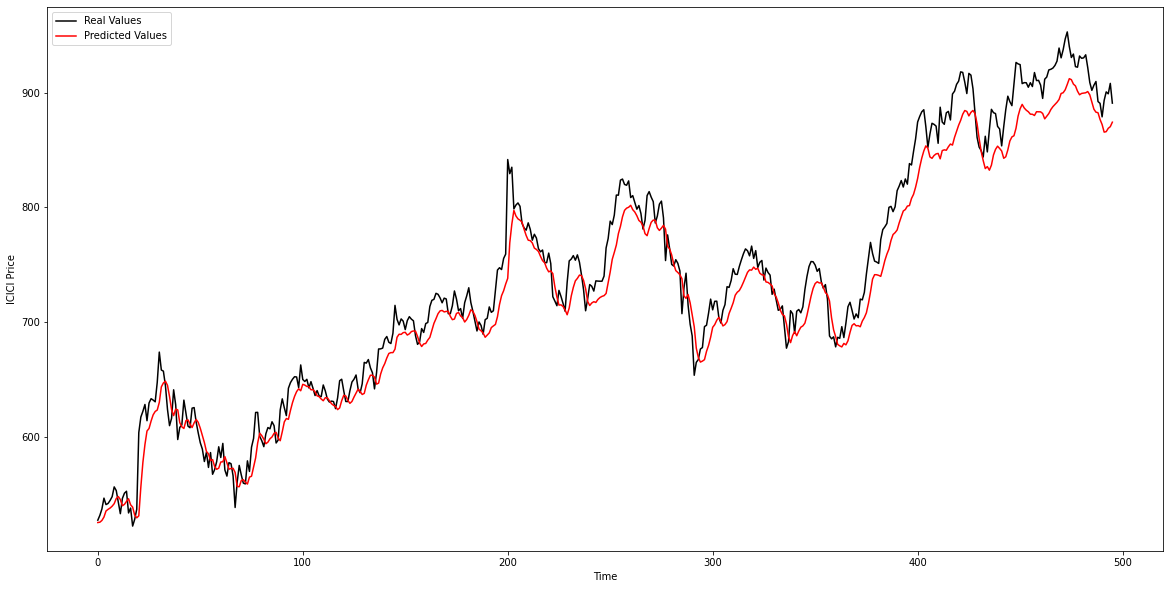

In [92]:
graph_pred(test_set,gru_pred)

#Bidirectional Model


In [93]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(units=150, activation='sigmoid',input_shape=(steps,1))))
model_bi.add(Dense(units=1))

In [94]:
model_bi.compile(optimizer='rmsprop',loss='mse')

In [95]:
model_bi.fit(x_train,y_train,epochs=30,batch_size=65)

Epoch 1/30
41/41 [==============================] - 19s 383ms/step - loss: 0.1091
Epoch 2/30
41/41 [==============================] - 14s 350ms/step - loss: 0.0653
Epoch 3/30
41/41 [==============================] - 14s 352ms/step - loss: 0.0540
Epoch 4/30
41/41 [==============================] - 14s 352ms/step - loss: 0.0470
Epoch 5/30
41/41 [==============================] - 15s 355ms/step - loss: 0.0383
Epoch 6/30
41/41 [==============================] - 14s 351ms/step - loss: 0.0341
Epoch 7/30
41/41 [==============================] - 15s 366ms/step - loss: 0.0257
Epoch 8/30
41/41 [==============================] - 24s 576ms/step - loss: 0.0281
Epoch 9/30
41/41 [==============================] - 14s 351ms/step - loss: 0.0229
Epoch 10/30
41/41 [==============================] - 14s 349ms/step - loss: 0.0204
Epoch 11/30
41/41 [==============================] - 14s 349ms/step - loss: 0.0181
Epoch 12/30
41/41 [==============================] - 16s 402ms/step - loss: 0.0171
Epoch 13/30
4

In [96]:
bi_pred=model_bi.predict(xtt)
bi_pred=mm.inverse_transform(bi_pred)

16/16 [==============================] - 2s 87ms/step


In [97]:
print(rmse(test_set,bi_pred))

The RMSE of the Value are : 32.61523260749286
None


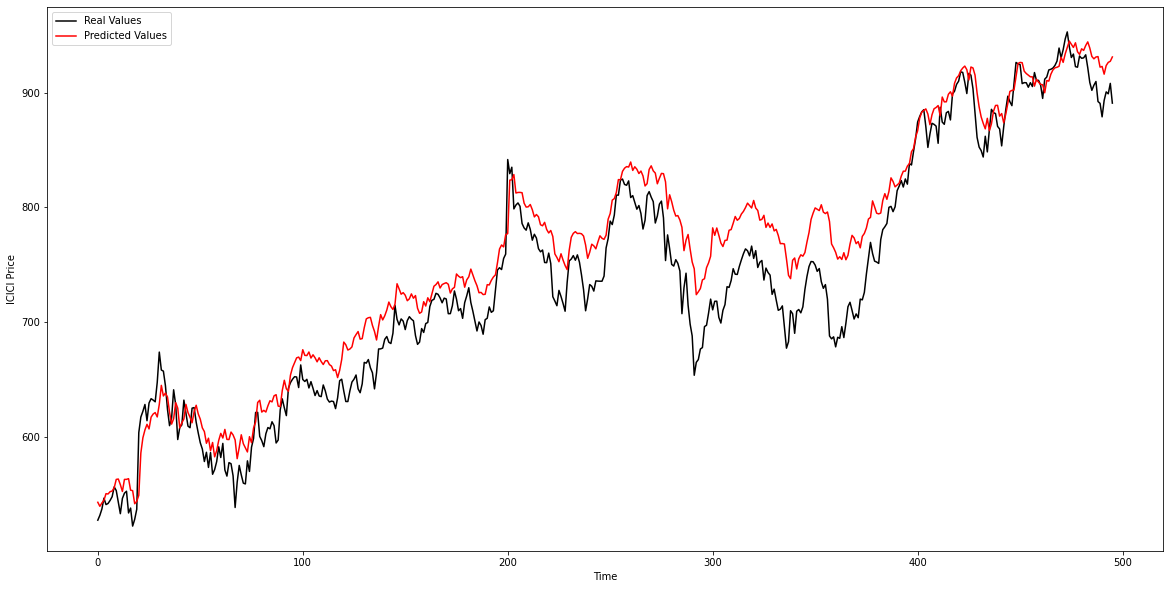

In [98]:
graph_pred(test_set,bi_pred)